# BE Optimisation combinatoire: planification d'une mine à ciel ouvert

Une mine à ciel ouvert est un type d'exploitation minière sans galerie sous-terraine, où on creuse progressivement le sol pour en extraire le minerai.

<img src="./imagePIT.jpeg" alt="Pit Mine" style="width: 500px;"/>

Le positionnement dans le sol des zones intéressantes à prélever, ainsi que les pourcentages en minerai et la facilité ou difficulté de prélèvement, sont donnés par les études géologiques. L'extraction de minerai est réalisée par blocs élémentaires (que l'on supposera cubiques). Suivant le pourcentage en minerai et la facilité d'extraction, on associera un coût positif ou négatif à l'extraction du bloc. De plus, des considérations de séquence et de géométrie viennent contraindre l'extraction. 

L'objectif de ce BE est de modéliser et résoudre un problème de planification de l'exploitation d'une mine à ciel ouvert afin de déterminer :
> -  l'ensemble des blocs à prélever pendant la durée d'exploitation de la mine

> -  la séquence d'extraction de ces blocs.

Pour cela, on utilisera la programmation linéaire en nombres entiers pour représenter les différentes contraintes et la fonction objectif.

`Source : Michel Gamache, Recherche opérationnelle minière, cours de l'Ecole Polytechnique de Montréal département de génie des mines.`


## 1. Détermination des contours ultimes de la mine
Les contours ultimes d'une mine à ciel ouvert représentent les contours géométriques de la mine après son exploitation ou encore ils représentent l'allure de la mine à la fin de sa vie économique. Les contours optimaux sont ceux qui permettent de maximiser les profits.
La détermination des contours ultimes d'une mine à ciel ouvert est essentielle pour une planification adéquate. elle permet entre autres d'estimer la quantité de minerai qu'il sera possible d'extraire du gisement, d'estimer la durée économique de l'exploitation, de planifier la dimension des installations de surface et de la machinerie et de planifier la capacité de production. La connaissance des contours permet également de planifier et d'organiser les séquences d'exploitation à court, moyen et long terme.

### 1.1 Contraintes d'extraction
La première contrainte à respecter est l'ordre d'extraction des blocs : chaque bloc ne peut être extrait que si les blocs qui le chapeautent dans le gisement sont extraits.
<img src="./Extract.png" alt="Extract" style="width: 250px;"/>

La seconde contrainte concerne la pente maximale des talus bordant la zone d'extraction. Dans ce
travail, pour simplifier le problème, on considèrera que les blocs extraits sont cubiques et que la pente
maximale est de 45°.

### 1.2 Exemple
Pour ce BE, nous allons travailler en deux dimensions, selon une section de la mine. La figure ci-dessous représente la section pour laquelle sont indiquées les coûts associés aux blocs. L'axe vertical représente la profondeur de la mine. La portion représentée en vert correspond à une zone de minerai, intéressante à exploiter. Lorsque les coûts sont positifs, leur extraction apporte un gain à la mine, sinon ils coûtent de l'argent. Mais pour extraire un bloc intéressant, il est nécessaire d'extraire tous les blocs qui sont au dessus de lui (son "cône d'extraction"), donc globalement le bilan de son extraction peut ne pas être intéressant.

<img src="./Section.png" alt="Section" style="width: 600px;"/>

La détermination du contour ultime consiste à optimiser le revenu d'extraction de la mine, en respectant les contraintes d'extraction. La solution de l'exemple précédent est donnée ci-dessous. La valeur obtenue est 137.

<img src="./Section2.png" alt="Contour ultime" style="width: 600px;"/>

### 1.3 Modélisation
Afin de résoudre ce problème d'optimisation en utilisant la programmation linéaire en nombres entiers, il faut choisir des variables de décision permettant d'écrire les différentes contraintes du problème ainsi que la fonction objectif sous la formes de relations linéaires. Pour cela on utilisera des variables binaires $extract_{ij}$ permettant d'indiquer si un bloc est extrait ou non.

<div class="alert alert-warning"> 
    
**Question :**<br>
Les contraintes d'extraction d'un bloc $(ij)$ peuvent s'écrire de la manière suivante:

$extract_{ij}\Rightarrow extract_{i'j'} \quad \forall (i'j')\in \text{cône d'extraction de }(ij)$

Modéliser ces contraintes sous la forme de relations linéaires impliquant les variables binaires $extract$.

Préciser comment ces contraintes permettent de satisfaire les contraintes de pente maximale.
<div>

<div class="alert alert-danger">

**Réponse** :<br> $\displaystyle 3\times extract_{i,j} \leq\sum_{j'=j-1}^{j+1} extract_{i-1,j'}$<br>On aura bien une pente de 45° puisque les blocs sont cubiques, et quon doit avoir enlevé les 2 du côté avant d'enlever celui en dessous au milieu.
 
</div>

<div class="alert alert-warning"> 
    
**Question :**<br>
Ecrire la fonction objectif. Le tableau des valeurs de coût sera nommé "mine".
<div>

<div class="alert alert-danger">

**Réponse** :<br>On recherche $\max z = \sum_{i,j} extract_{i,j}\times mine_{i,j}$  
 
</div>

<div class="alert alert-warning"> 
    
**Question :**<br>
Ecrire le code Pulp permettant de résoudre le problème du contour ultime. Les données sont celles de l'exemple ci-dessus.

Le code donné ci-dessous permet de représenter graphiquement la solution
<div>

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Commenter cette ligne si vous avez installé Anaconda et la bibliothèque PuLP sur votre ordinateur
!pip install pulp

import pulp

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 3.7 MB/s eta 0:00:00


Status:  Optimal
Variables:  1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
Objective:  137.0


137.0

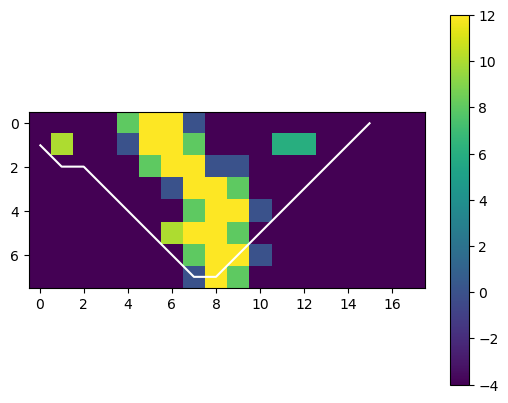

In [3]:
mine = np.loadtxt("pitmine.txt", dtype=int)
levels, columns = mine.shape
plt.imshow(mine, clim=(-4, 12), interpolation='none')
plt.colorbar()

### VOTRE CODE PULP ###

# New problem 
prob = pulp.LpProblem("Mines", pulp.LpMaximize)

# Decision variables
extract = np.empty((levels,columns), dtype=object)
for i in range(levels):
    for j in range(columns):
        extract[i,j] = pulp.LpVariable('extract_{}_{}'.format(i,j),cat=pulp.LpBinary)


# Constraints
for i in range(1,levels):
    for j in range(1, columns-1):
        prob += 3*extract[i,j] <= extract[i-1,j-1] + extract[i-1,j] + extract[i-1,j+1]

# Objective function
prob += pulp.lpSum(mine * extract)

# Problem solving
status = prob.solve()
print("Status: ",pulp.LpStatus[status])

# Optimum values
assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables: ", end=' ')
for i in range(levels):
    for j in range(columns):
        print(pulp.value(extract[i,j]), end=' ')
print()

print("Objective: ",pulp.value(prob.objective))

### COMPLEMENT POUR TRACER LE CONTOUR ###
extraction = [ [extract[i, j].value() for j in range(columns)] for i in range(levels)]
plt.contour(extraction, levels=[0], cmap=plt.cm.binary)

prob.objective.value()

<div class="alert alert-warning"> 
    
**Question :**<br>
Modifier le programme pour résoudre la relaxation linéaire du problème.
<div>

Status:  Optimal
Variables:  1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
Objective:  137.0
58.0


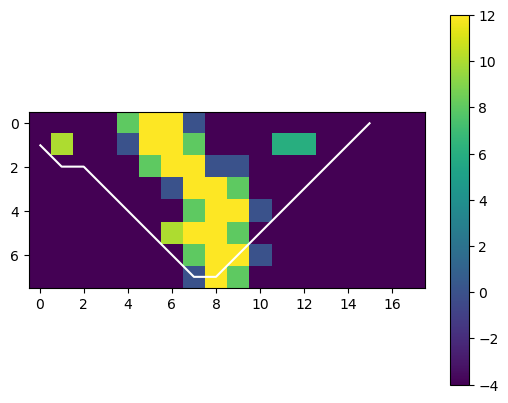

In [4]:
plt.imshow(mine, clim=(-4, 12), interpolation='none')
plt.colorbar()

### VOTRE CODE PULP ###

# New problem 
prob = pulp.LpProblem("Mines", pulp.LpMaximize)

# Decision variables
extract = np.empty((levels,columns), dtype=object)
for i in range(levels):
    for j in range(columns):
        extract[i,j] = pulp.LpVariable('extract_{}_{}'.format(i,j), cat='Continuous', lowBound=0, upBound=1)


# Constraints
for i in range(1,levels):
    for j in range(1, columns-1):
        prob += extract[i,j] <= extract[i-1,j-1]
        prob += extract[i,j] <= extract[i-1,j]
        prob += extract[i,j] <= extract[i-1,j+1]

# Objective function
prob += pulp.lpSum(mine * extract)

# Problem solving
status = prob.solve()
print("Status: ",pulp.LpStatus[status])

# Optimum values
assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables: ", end=' ')
for i in range(levels):
    for j in range(columns):
        print(pulp.value(extract[i,j]), end=' ')
print()

print("Objective: ",pulp.value(prob.objective))


### COMPLEMENT POUR TRACER LE CONTOUR ###
extraction = [ [extract[i, j].value() for j in range(columns)] for i in range(levels)]
plt.contour(extraction, levels=[0], cmap=plt.cm.binary)

prob.objective.value()
somme = 0
for i in range(levels):
    for j in range(columns):
        somme += extract[i,j].value()
print(somme)

<div class="alert alert-warning"> 
    
**Question :**<br>
Affichez les résultats pertinents.  
Que peut-on conclure sur le problème de contour optimal ?
<div>

<div class="alert alert-danger">
    
**Réponse** :<br>
 
</div>

## 2. Détermination de la séquence annuelle de minage
Ce problème de planification stratégique consiste à trouver les blocs qui seront extraits chaque
année. Ceci revient à déterminer le contour de la mine chaque année. Ce problème est beaucoup plus
difficile que le problème du contour ultime, car il ne suffit plus de déterminer si un bloc est extrait
ou non, il faut en plus savoir quelle année il sera extrait. De plus, il faut tenir compte de contraintes
additionnelles telles que la quantité minimale ou maximale de matière qui peut être extraite chaque
année ou l'utilisation des équipements. 

### 2.1 Planification avec contrainte de capacité
On considère uniquement une limite maximum sur le nombre de blocs qu'on peut extraire chaque année, fixée à 20 blocs. Pour modéliser le problème en PLNE, il faut ajouter la dimension temporelle au problème du contour ultime.

<div class="alert alert-warning"> 
    
**Question :**<br>
Quel est le nombre d'année minimum pour extraire les blocs de la solution précédente ?
<div>

<div class="alert alert-danger">

**Réponse** : Il y a 58 blocs à extraire, donc 3 ans.<br>
 
</div>

<div class="alert alert-warning">
    
**Question :**<br>
Proposer de nouvelles variables d'extraction qui permettent de repérer si un bloc est extrait ou non l'année $n$.  
<div>

<div class="alert alert-danger">

**Réponse** : $extraction_{i,j,n}=0$ ou $1$<br>Une fois que $extraction_{i,j,n}=1$, alors la variable restera toujours égale à $1$
 
</div>

<div class="alert alert-warning"> 
    
**Question :**<br>
Récrire les contraintes d'extraction et la fonction objectif. Attention, un bloc extrait l'année $n$ le reste les années suivantes.
<div>

<div class="alert alert-danger">

**Réponse** :$$extract_{i,j,n}\geq extract_{i,j,n-1}$$<br>$$\displaystyle 3\times extract_{i,j,n} \leq\sum_{j'=j-1}^{j+1} extract_{i-1,j',n} $$ $$\sum_{i,j} extract_{i,j,n}-\sum_{i,j} extract_{i,j,n-1}\leq 20$$
 
</div>

<div class="alert alert-warning"> 
    
**Question :**<br>
Ecrire le code Pulp permettant de résoudre le problème de planification

<div>

Status:  Optimal
Variables:  0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0

<ipython-input-66-e51a07c7e794>:67: UserWarning: No contour levels were found within the data range.
  plt.contour(extraction, levels=[0], cmap=plt.cm.binary)


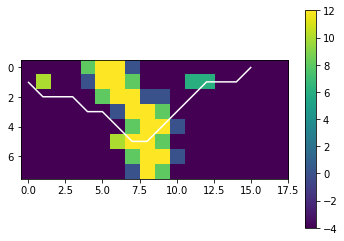

In [66]:
### VOTRE CODE PULP ###

plt.imshow(mine, clim=(-4, 12), interpolation='none')
plt.colorbar()

### VOTRE CODE PULP ###

# New problem 
prob = pulp.LpProblem("Mines", pulp.LpMaximize)

n_max = 3

# Decision variables
extract = np.empty((levels,columns, n_max), dtype=object)
for i in range(levels):
    for j in range(columns):
        for n in range(n_max):
            extract[i,j,n] = pulp.LpVariable('extract_{}_{}_{}'.format(i,j,n), cat=pulp.LpBinary)


# Constraints
for n in range(1,n_max):
    for i in range(1,levels):
        prob += extract[i,0,n] <= extract[i-1,0,n]
        prob += extract[i,0,n] <= extract[i-1,1,n]
        prob += extract[i,columns-1,n] <= extract[i-1,columns-1,n]
        prob += extract[i,columns-1,n] <= extract[i-1,columns-2,n]
        for j in range(1, columns-1):
            prob += extract[i,j,n] <= extract[i-1,j-1,n]
            prob += extract[i,j,n] <= extract[i-1,j,n]
            prob += extract[i,j,n] <= extract[i-1,j+1,n]

for n in range(1,n_max):
    for i in range(levels):
        for j in range(columns):       
            prob += extract[i,j,n] >= extract[i,j,n-1]
            
prob += pulp.lpSum(extract[:,:,0]) <= 20
for n in range(1,n_max):
    prob += pulp.lpSum(extract[:,:,n])-pulp.lpSum(extract[:,:,n-1]) <= 20

# Objective function
prob += pulp.lpSum(mine * extract[:,:,n_max-1])

# Problem solving
status = prob.solve()
print("Status: ",pulp.LpStatus[status])

# Optimum values
assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables: ", end=' ')
for i in range(levels):
    for j in range(columns):
        for n in range(n_max):
            print(pulp.value(extract[i,j,n]), end=' ')
print()

print("Objective: ",pulp.value(prob.objective))


### COMPLEMENT POUR TRACER LE CONTOUR ###

# extraction = [ [extract[i, j, n_max-1].value() for j in range(columns)] for i in range(levels)]
# plt.contour(extraction, levels=[0], cmap=plt.cm.binary)
extraction = [ [extract[i, j, n_max-2].value() for j in range(columns)] for i in range(levels)]
plt.contour(extraction, levels=[0], cmap=plt.cm.binary)
#extraction = [ [extract[i, j, n_max-3].value() for j in range(columns)] for i in range(levels)]
#plt.contour(extraction, levels=[0], cmap=plt.cm.binary)


prob.objective.value()
somme = 0
for i in range(levels):
    for j in range(columns):
        somme += extract[i,j,n_max-1].value()
print(somme)


<div class="alert alert-warning"> 
    
**Question :**<br>
Commentez les résultats obtenus.
<div>

<div class="alert alert-danger">

**Réponse** :<br>
 
</div>

### 2.2 Planification avec contrainte de capacité et actualisation
Même problème que précédemment, mais on prend en compte la notion d'actualisation. On considère un taux d'actualisation de $9\%$: le bloc $(i,j)$ extrait l'année $k$ avec un bénéfice de $mine(i,j)$ rapportera seulement $mine(i,j)/(1+0,09)$ l'année suivante.


<div class="alert alert-warning"> 
    
**Question :**<br>
Ecrire le code Pulp permettant de résoudre le problème de planification

<div>

In [ ]:
### VOTRE CODE PULP ###


<div class="alert alert-warning"> 
    
**Question :**<br>
Commentez les résultats obtenus.
<div>

<div class="alert alert-danger">

**Réponse** :<br>
 
</div>